In [1]:
from tranction_reduction import TranctionReduction
import pandas as pd
import numpy as np
import sys
import numpy_indexed as npi
from itertools import combinations, product
from functools import reduce
from collections.abc import Iterable
import math
import timeit 
# use for vertify
import matplotlib.pyplot as plt
import apriori, association_rules


In [2]:
real_dataset_path = "/home/sokhorn/sokhorn/dataSet/data/Online Retail.csv"
testing_dataset_path = '/home/sokhorn/sokhorn/dataSet/data/sample_data_set_fuzzy.csv'
sample_dataset = pd.read_csv(
    testing_dataset_path, sep=',', usecols=[
        'InvoiceNo',
        'StockCode',
        'Quantity'
    ])
sample_dataset
item_sets = (
    sample_dataset.groupby(['InvoiceNo', 'StockCode', ])['Quantity']
    .sum().unstack().reset_index().fillna(0)
    .set_index("InvoiceNo")
)
# item_sets = item_sets.iloc[:, :150] 
# item_sets = item_sets.head(958)
item_sets = item_sets.applymap(lambda x: 1 if x > 0 else 0)
item_sets.reindex(sorted(item_sets.columns), axis=1)
item_sets

StockCode,A,B,C,D,E,F
InvoiceNo,,,,,,
1.0,1,1,0,1,0,0
2.0,1,1,1,1,0,0
3.0,0,1,0,1,0,0
4.0,0,1,1,1,1,0
5.0,1,0,1,0,1,0
6.0,0,1,0,1,0,1
7.0,1,0,0,0,1,1
8.0,0,0,1,0,0,1
9.0,0,1,1,0,0,1


In [3]:
tranc_reduction = TranctionReduction(item_sets)


In [4]:
min_supports = [5, 10, 15, 20, 25]


In [5]:
result = []

In [6]:
df_rc, rc = tranc_reduction.df_rc(item_sets)
df_rc

,A,B,C,D,E,F
0,1,1,0,1,0,0
1,1,1,1,1,0,0
2,0,1,0,1,0,0
3,0,1,1,1,1,0
4,1,0,1,0,1,0
5,0,1,0,1,0,1
6,1,0,0,0,1,1
7,0,0,1,0,0,1
8,0,1,1,0,0,1
9,1,1,1,1,0,1


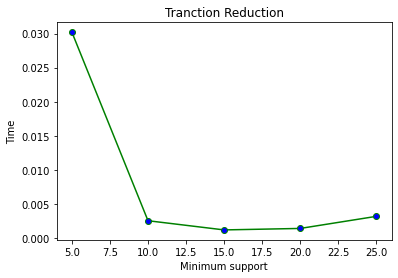

In [7]:
result = []
for i in min_supports:
    stat_time = timeit.default_timer()
    tranc_reduction.frequent_item_set_gen(i)
    stop = timeit.default_timer()
    result.append([i, stop - stat_time])
result = np.array(result)
mini_supports = result[:, 0:1:]
times = result[:, 1:2:]
# plotting the points
plt.plot(mini_supports.flatten(), times.flatten(), color='green',
         marker='o', markerfacecolor='blue', markersize=6)


# naming the x axis
plt.xlabel('Minimum support')
# naming the y axis
plt.ylabel('Time')

# giving a title to my graph
plt.title('Tranction Reduction')

# function to show the plot
plt.show()


### Computing theminimum0-support for mining frequent patterns

In [8]:
item_sets

StockCode,A,B,C,D,E,F
InvoiceNo,,,,,,
1.0,1,1,0,1,0,0
2.0,1,1,1,1,0,0
3.0,0,1,0,1,0,0
4.0,0,1,1,1,1,0
5.0,1,0,1,0,1,0
6.0,0,1,0,1,0,1
7.0,1,0,0,0,1,1
8.0,0,0,1,0,0,1
9.0,0,1,1,0,0,1


In [9]:
tranc_reduction_apri = TranctionReduction(item_sets)
tranc_reduction_apri.df_rc(item_sets)

(   A  B  C  D  E  F
 0  1  1  0  1  0  0
 1  1  1  1  1  0  0
 2  0  1  0  1  0  0
 3  0  1  1  1  1  0
 4  1  0  1  0  1  0
 5  0  1  0  1  0  1
 6  1  0  0  0  1  1
 7  0  0  1  0  0  1
 8  0  1  1  0  0  1
 9  1  1  1  1  0  1,
 0    1
 1    1
 2    1
 3    1
 4    1
 5    1
 6    1
 7    1
 8    1
 9    1
 Name: RC, dtype: int64)

In [10]:
import imp
from telnetlib import RCP
from typing_extensions import Self
import numpy as np
import typing
import itertools
import numpy_indexed as npi
import pandas as pd
from functools import reduce

from soupsieve import select


class TranctionReduction1:

    def __init__(self, itemsets):
        # RC count generation
        self. itemset_reduct, self.rc_values = npi.count(itemsets.values)

    # Support Count
    # reduce(function, input)
    def support_k_itemst(self, k_itemst):
        s = 0
        for i in range(len(k_itemst)):
            s += reduce(lambda a, b: a & b, k_itemst[i] & self.RC[i])
        return s

    def support_appriori(self, k_itemset, item_sets):
        # get all row which value are equal to 1
        mask = (k_itemset == 1).all(axis=1)
        return len(item_sets[mask]) / len(item_sets)

    def get_frequent_tranc_apiori(self, ck, min_support, prev_discard, item_sets):
        L = []
        support_count = []
        new_discard = []
        k = len(prev_discard)
        for i in range(len(ck)):
            discard_before = False
            result = ck[i]

            # if result in prev_discard than break this loop
            if k > 0:
                for it in prev_discard[k]:
                    if set(it).issubset(set(result)):
                        discard_before = True
                        break

            if not discard_before:
                # print(f'item {mergeKItemIntoOne(item)}')
                # print(f"Ck-reuslt {ck}, result {result}")
                count = self.support_appriori(item_sets[result], item_sets)

                if count >= min_support:

                    L.append(result)
                    support_count.append(count)
                else:
                    new_discard.append(result)
        return L, support_count, new_discard

    def frequent_item_set_gen_apiori(self, item_sets, minimum_support):
        C = {}
        L = {}
        Discard = {}
        support_count = {}
        itemset_size = 1
        Discard.update({itemset_size: []})

        # remove each column who support count are less than min_support for 1 itemsets
        # ---------------------------
        rc_1_itemset = item_sets.sum(axis=0)
        # remove all column which sum of row are ness than user defind support threshold
        cut_our_cols = rc_1_itemset.loc[lambda x: x < minimum_support].index
        # cut our every itemset which are sum of each row are less than user defind support
        item_sets.drop(labels=cut_our_cols, axis=1, inplace=True)
        # updpate the first item set which are in frequent
        Discard.update({itemset_size: cut_our_cols})

        # Frequent 1 itemsets
        C.update({itemset_size: np.reshape(list(item_sets.columns), (-1, 1))})

        f, supp, new_discard = self.get_frequent_tranc_apiori(
            C[itemset_size], minimum_support, Discard, item_sets)

        Discard.update({itemset_size: new_discard})
        L.update({itemset_size: f})
        support_count.update({itemset_size: supp})

        k = itemset_size + 1
        while True:
            try:
                C.update(
                    {
                        k: list(join_step(L[k - 1]))
                    }
                )
                f, supp, new_discard = self.get_frequent_tranc_apiori(
                    C[k], minimum_support, Discard, item_sets)
                L.update({k: f})
                if(len(L[k]) == 0):
                    C.pop(k)
                    break
                else:
                    Discard.update({k: new_discard})
                    support_count.update({k: supp})
                    k += 1
            except ValueError as err:
                print(f"Hello, there some error with {err}")
                break

        return C, support_count, Discard


def join_step(itemsets: typing.List[tuple]):
    i = 0

    while i < len(itemsets):

        skip = 1

        * itemset_first, itemset_last = itemsets[i]

        tail_items = [itemset_last]
        tail_items_append = tail_items.append

        for j in range(i + 1, len(itemsets)):

            *itemset_n_first, itemset_n_last = itemsets[j]

            if itemset_first == itemset_n_first:  # k - 1, item are identical
                tail_items_append(itemset_n_last)
                skip += 1
            else:
                break

        itemset_first_tuple = tuple(itemset_first)
        for a, b in sorted(itertools.combinations(tail_items, 2)):
            yield list(itemset_first_tuple + (a,) + (b,))

        i += skip


In [11]:
tranc_reduction_apri = TranctionReduction1(item_sets)
fi, s, d = tranc_reduction_apri.frequent_item_set_gen_apiori(
    item_sets, minimum_support=0
)

In [12]:
item_column = item_sets.columns

In [13]:
def all_itemset(item_column):
    for i in range(1, len(item_column)):
        oc = combinations(item_column, i)
        for c in oc:
            support = tranc_reduction_apri.support_appriori(
                item_sets[list(c)], item_sets)

            if(support > 0):
                print(f"Item : {list(c)}, support : {support}")
                yield support
            if(len(c) >= 3):
                pass


def a_b_avg(supports):
    return min(supports), max(supports), sum(supports) / len(supports)


a_b_avg(list(all_itemset(item_column)))


Item : ['A'], support : 0.5
Item : ['B'], support : 0.7
Item : ['C'], support : 0.6
Item : ['D'], support : 0.6
Item : ['E'], support : 0.3
Item : ['F'], support : 0.5
Item : ['A', 'B'], support : 0.3
Item : ['A', 'C'], support : 0.3
Item : ['A', 'D'], support : 0.3
Item : ['A', 'E'], support : 0.2
Item : ['A', 'F'], support : 0.2
Item : ['B', 'C'], support : 0.4
Item : ['B', 'D'], support : 0.6
Item : ['B', 'E'], support : 0.1
Item : ['B', 'F'], support : 0.3
Item : ['C', 'D'], support : 0.3
Item : ['C', 'E'], support : 0.2
Item : ['C', 'F'], support : 0.3
Item : ['D', 'E'], support : 0.1
Item : ['D', 'F'], support : 0.2
Item : ['E', 'F'], support : 0.1
Item : ['A', 'B', 'C'], support : 0.2
Item : ['A', 'B', 'D'], support : 0.3
Item : ['A', 'B', 'F'], support : 0.1
Item : ['A', 'C', 'D'], support : 0.2
Item : ['A', 'C', 'E'], support : 0.1
Item : ['A', 'C', 'F'], support : 0.1
Item : ['A', 'D', 'F'], support : 0.1
Item : ['A', 'E', 'F'], support : 0.1
Item : ['B', 'C', 'D'], support :

(0.1, 0.7, 0.2372093023255812)

In [14]:
def lean(support_count_i_itemset, M, avg):
    less_than_avg = []
    greater_than_avg = []
    for j in support_count_i_itemset:
        if j < avg:
            less_than_avg.append(1)
        elif j > avg:
            greater_than_avg.append(1)
    # print(f"Less avg {less_than_avg}")
    # print(f"Greater avg {greater_than_avg}")
    return (sum(less_than_avg) - sum(greater_than_avg)) / M


In [15]:
def a_avgsupp(m, k, N):
    n_over_N = sum([math.pow(m / N, i) for i in range(k, m)])
    operation = 1 / (m - k + 1)
    return n_over_N * operation


a_avgsupp(5, 2, 1000)


6.28140625e-06

In [16]:
def actul_minimum_support(a, b, r_min, n=1):
    return ((pow(b, n) - pow(a, n)) * r_min + pow(a, n))


In [17]:
actul_minimum_support(0.25, 0.75, 0.7)

0.6

In [18]:
actul_minimum_support(0.25, 0.75, 0.7, n=3)

0.3

In [19]:
ac_mini = actul_minimum_support(a=0.25, b=0.75, r_min=0.7, n=3)
ac_mini

0.3

In [20]:
item_sets

StockCode,A,B,C,D,E,F
InvoiceNo,,,,,,
1.0,1,1,0,1,0,0
2.0,1,1,1,1,0,0
3.0,0,1,0,1,0,0
4.0,0,1,1,1,1,0
5.0,1,0,1,0,1,0
6.0,0,1,0,1,0,1
7.0,1,0,0,0,1,1
8.0,0,0,1,0,0,1
9.0,0,1,1,0,0,1


In [21]:
fi, s, d = tranc_reduction_apri.frequent_item_set_gen_apiori(
    item_sets, minimum_support=ac_mini
)
fi

{1: array([['A'],
        ['B'],
        ['C'],
        ['D'],
        ['E'],
        ['F']], dtype='<U1'),
 2: [['A', 'B'],
  ['A', 'C'],
  ['A', 'D'],
  ['A', 'E'],
  ['A', 'F'],
  ['B', 'C'],
  ['B', 'D'],
  ['B', 'E'],
  ['B', 'F'],
  ['C', 'D'],
  ['C', 'E'],
  ['C', 'F'],
  ['D', 'E'],
  ['D', 'F'],
  ['E', 'F']],
 3: [['A', 'B', 'C'],
  ['A', 'B', 'D'],
  ['A', 'C', 'D'],
  ['B', 'C', 'D'],
  ['B', 'C', 'F'],
  ['B', 'D', 'F'],
  ['C', 'D', 'F']]}

In [22]:
s

{1: [0.5, 0.7, 0.6, 0.6, 0.3, 0.5],
 2: [0.3, 0.3, 0.3, 0.4, 0.6, 0.3, 0.3, 0.3],
 3: [0.3, 0.3]}

In [23]:
tranc_reduction_apri.support_appriori(item_sets [['A', 'B', 'C']], item_sets)

0.2